Binary Classification Approach to Predict IPL Winner

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error



In [309]:
import pandas as pd
ml_rashmi = pd.read_csv("aggregated_match_data_by_innings_wo_small_dataset.csv")
df = ml_rashmi.copy()

In [310]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       880 non-null    int64  
 1   id               880 non-null    int64  
 2   inning1_runs     880 non-null    int64  
 3   inning1_wickets  880 non-null    int64  
 4   inning1_balls    880 non-null    int64  
 5   inning2_runs     880 non-null    int64  
 6   inning2_wickets  880 non-null    int64  
 7   inning2_balls    880 non-null    int64  
 8   season           880 non-null    int64  
 9   city             880 non-null    object 
 10  venue            880 non-null    object 
 11  toss_winner      880 non-null    object 
 12  toss_decision    880 non-null    object 
 13  team1            880 non-null    object 
 14  team2            880 non-null    object 
 15  winner           880 non-null    object 
 16  result           880 non-null    object 
 17  result_margin   

In [311]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'id', 'result', 'result_margin', 'player_of_match']
df.drop(columns=columns_to_drop, inplace=True)

In [312]:
# Create binary target: 1 if team1 wins, else 0
df['winner_binary'] = (df['winner'] == df['team1']).astype(int)



In [313]:
print(f"Shape of target (y): {y.shape}")
print("-" * 30)

Shape of target (y): (880,)
------------------------------


In [317]:
# Select features
features = ['team1', 'team2', 'city', 'venue', 'toss_winner', 'toss_decision',
            'inning1_runs', 'season', 'umpire1', 'umpire2', 'inning1_balls', 'inning1_wickets']
X = df[features].copy()
y = df['winner_binary']


In [319]:
# Label Encoding for categorical features
cat_features = ['team1', 'team2', 'city', 'venue', 'toss_winner', 'toss_decision', 'umpire1', 'umpire2']
num_features = ['inning1_runs', 'season', 'inning1_balls', 'inning1_wickets']

encoders = {}
for col in cat_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le
  
# Print encoded features
print("\nEncoded features (first 5 rows):")
print(X.head())




Encoded features (first 5 rows):
   team1  team2  city  venue  toss_winner  toss_decision  inning1_runs  \
0      0      4     2     15            0              1           222   
1      6      1     7     24            1              0           240   
2      2      7    10     10            7              0           129   
3      5      0    23     35            5              0           165   
4      4      3    21      9            3              0           110   

   season  umpire1  umpire2  inning1_balls  inning1_wickets  
0    2008        9       41            124                3  
1    2008       34       52            124                5  
2    2008        8       15            122                8  
3    2008       51       14            123                7  
4    2008       10       24            118               10  


In [320]:
# Scale numerical features
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])


In [321]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [322]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [323]:
# Predictions
y_pred_continuous = model.predict(X_test)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

In [324]:
# Regression Evaluation
mae = mean_absolute_error(y_test, y_pred_continuous)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_continuous))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")


MAE: 0.4706, RMSE: 0.4874


In [325]:
# Classification Evaluation
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


Accuracy: 0.5568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        85
           1       0.58      0.53      0.55        91

    accuracy                           0.56       176
   macro avg       0.56      0.56      0.56       176
weighted avg       0.56      0.56      0.56       176



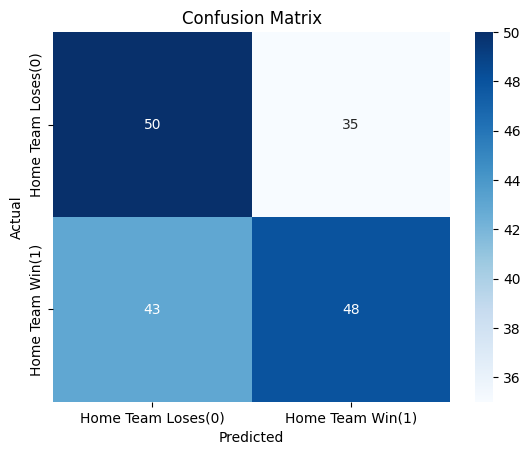

In [339]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Team Loses(0)','Home Team Win(1)'], yticklabels=['Home Team Loses(0)','Home Team Win(1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [327]:
print(df['winner_binary'].value_counts())


1    454
0    426
Name: winner_binary, dtype: int64


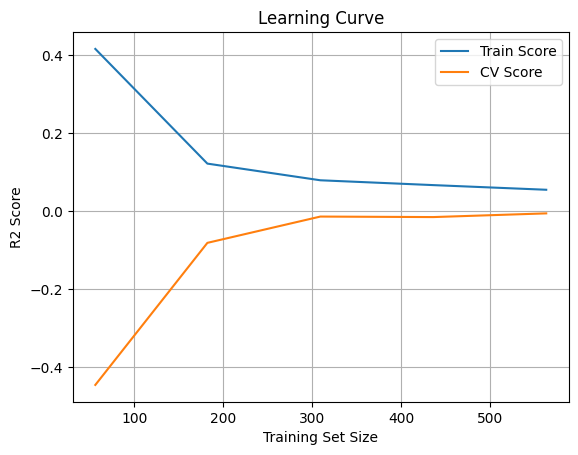

In [328]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='CV Score')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()


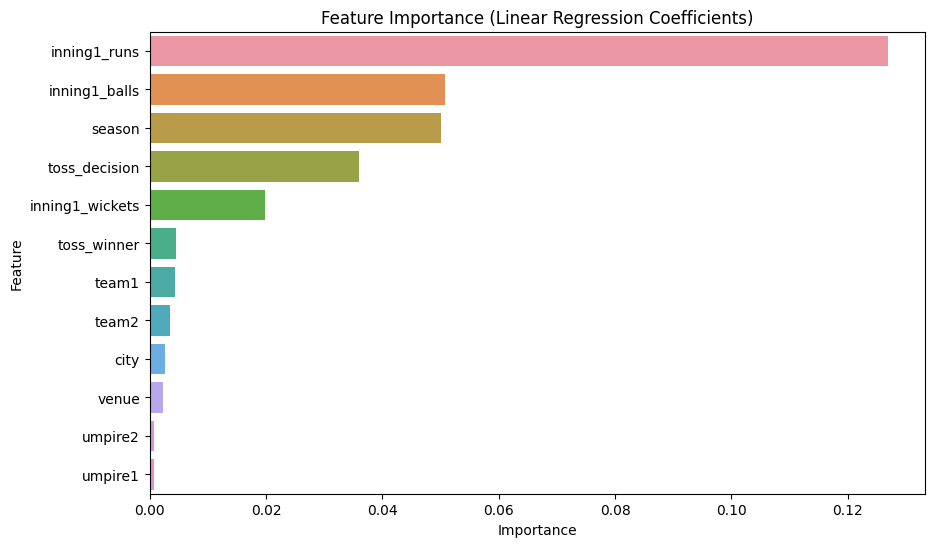

In [329]:
# Feature Importance
importances = np.abs(model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


Hyper Parameter Tuning for Binary Classification

In [330]:
# Hyperparameter tuning for fit_intercept
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': True}


In [ ]:
# Train model with best parameters 
best_model = LinearRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions 
y_pred_continuous_best = best_model.predict(X_test)
y_pred_binary_best = (y_pred_continuous_best >= 0.5).astype(int)

In [ ]:
# Regression Evaluation 
mae_best = mean_absolute_error(y_test, y_pred_continuous_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_continuous_best))
print("After Hyperparameter Tuning")
print(f"MAE: {mae_best:.4f}, RMSE: {rmse_best:.4f}")

After Hyperparameter Tuning
MAE: 0.4706, RMSE: 0.4874


In [ ]:
# Classification Evaluation 
acc_best = accuracy_score(y_test, y_pred_binary_best)
print("Accuracy:", acc_best)
print("Classification Report:\n", classification_report(y_test, y_pred_binary_best))

Accuracy: 0.5568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        85
           1       0.58      0.53      0.55        91

    accuracy                           0.56       176
   macro avg       0.56      0.56      0.56       176
weighted avg       0.56      0.56      0.56       176



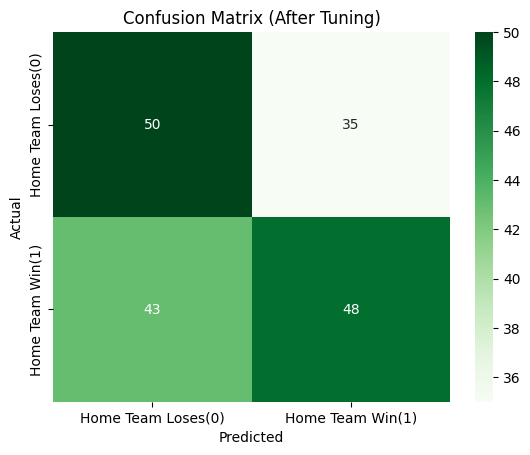

In [ ]:
# Confusion Matrix 
cm_best = confusion_matrix(y_test, y_pred_binary_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Home Team Loses(0)','Home Team Win(1)'], yticklabels=['Home Team Loses(0)','Home Team Win(1)'])
plt.title("Confusion Matrix (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


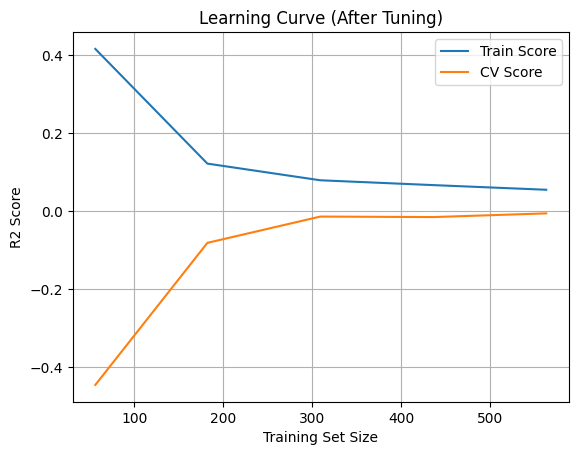

In [ ]:
# Learning Curve 
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='CV Score')
plt.title("Learning Curve (After Tuning)")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Feature Importance 
importances = np.abs(best_model.coef_)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

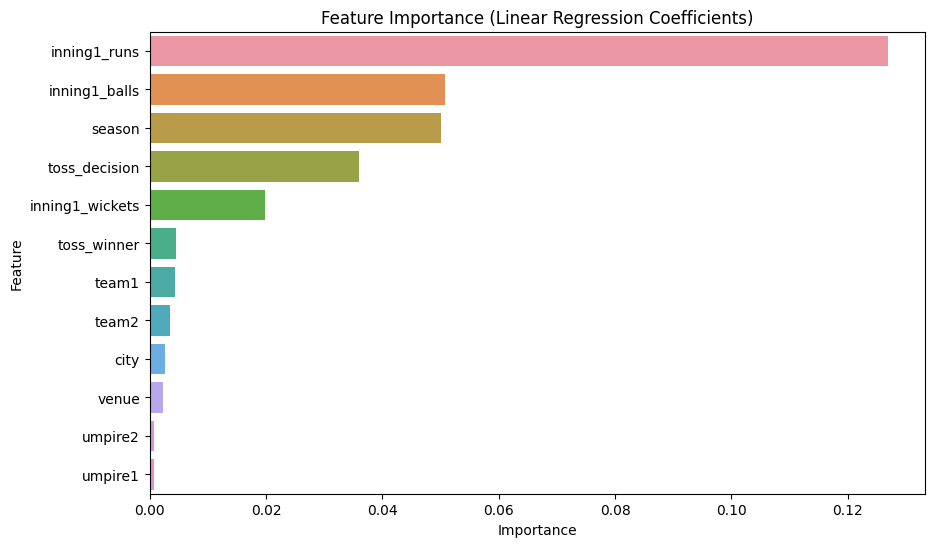

In [338]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()
